<a href="https://colab.research.google.com/github/HwangHanJae/datascience-basic-tect/blob/main/seaborn_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###seaborn 라이브러리 정리
- [seaborn API 링크](https://seaborn.pydata.org/api.html)
- seborn은 파이썬 데이터 시각화 라이브러리
- matplotlib에 기반하였음

###라이브러리 로드하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from IPython.display import set_matplotlib_formats

In [8]:
np.random.seed(0)

###그래프 스타일 및 선명한 폰트 설정

In [2]:
plt.style.use('ggplot')
set_matplotlib_formats('svg')

###heatmap - 상관행렬 히트맵
- 직사각형 데이터를 색상 인코딩된 행렬로 플로팅

###heatmap 실습에 사용할 데이터
- flights

#### flights 데이터

In [3]:
#데이터 로드하기
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [5]:
#passengers는 승객수를 나타내는데, 104~ 622명 평균은 280명, 중앙값은 265명 
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [6]:
#year column은 1949년~1960년을 나타내고 있다.
flights['year'].unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960])

In [7]:
#month column은 1월 부터 12월
flights['month'].unique()

['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

###그래프 확인

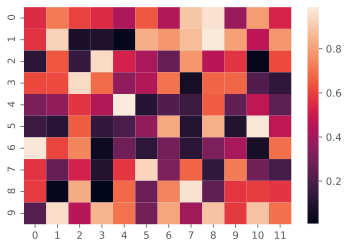

In [10]:
uniform_data = np.random.rand(10,12)
sns.heatmap(uniform_data)

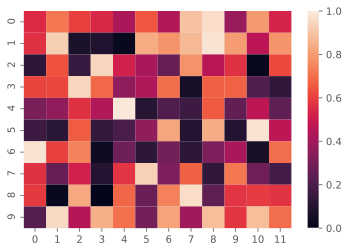

In [11]:
#colormap의 제한 변경
#vmin, vmax 옵션 사용
sns.heatmap(uniform_data, vmin=0, vmax=1)

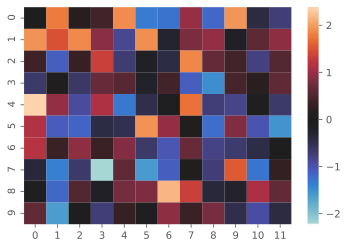

In [13]:
#0을 중심으로하는 데이터에 대한 히트맵 표현
normal_data = np.random.randn(10,12)
sns.heatmap(normal_data, center=0)

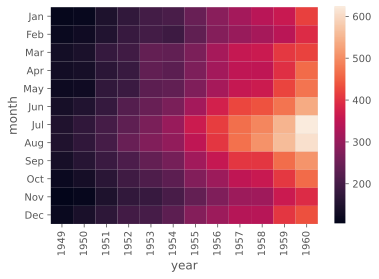

In [17]:
flights = flights.pivot(index='month', columns='year', values='passengers')
sns.heatmap(flights)

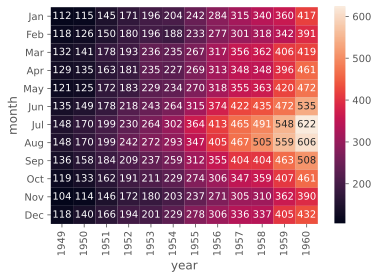

In [18]:
#annot =True, fmt='d' 옵션 사용
#숫자를 히트맵에 표현
sns.heatmap(flights, annot=True, fmt='d')

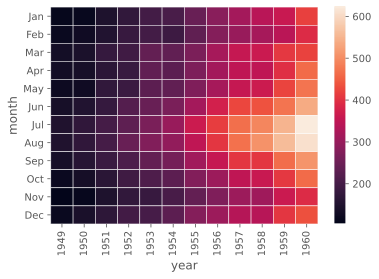

In [19]:
#각 셀 사이에 라인 추가
#linewidths=.5 옵션 사용
sns.heatmap(data = flights, linewidths=.5)

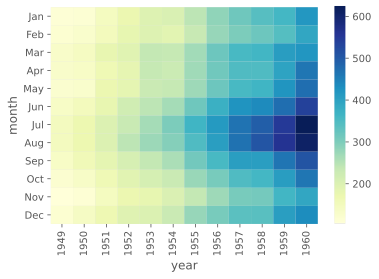

In [20]:
#다른 colormap 사용

sns.heatmap(flights, cmap='YlGnBu')

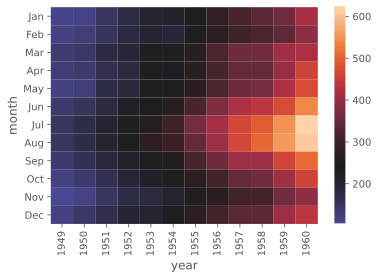

In [21]:
#특정 값을 컬러맵 중앙에 매치
sns.heatmap(flights, center=flights.loc['Jan', 1955])

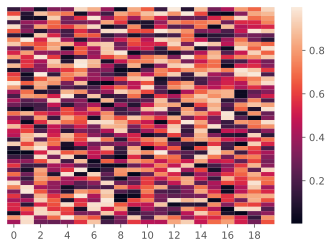

In [23]:
#다른 모든 열 레이블을 플로팅하고, 행 레이블을 플로팅하지 않습니다.
data = np.random.rand(50,20)
sns.heatmap(data, xticklabels=2, yticklabels=False)

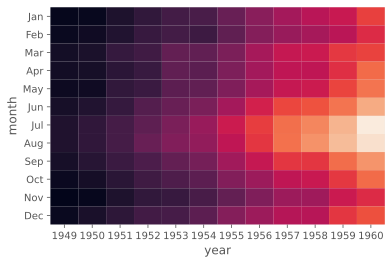

In [24]:
#colorbar를 그리지 않음
sns.heatmap(flights, cbar=False)

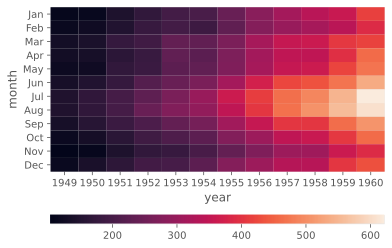

In [27]:
#colorbar를 다른 축에 표현
grid_kws = {"height_ratios": (.9, .05), "hspace" : .5}
f, (ax, cbar_ax)  = plt.subplots(2, gridspec_kw=grid_kws)

sns.heatmap(flights, ax=ax, cbar_ax=cbar_ax, cbar_kws={"orientation":"horizontal"})

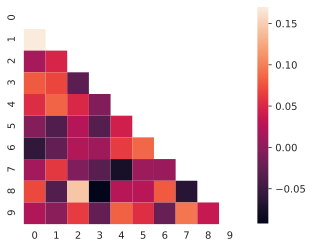

In [31]:
#mask를 사용하여 matrix의 절반을 표현
corr = np.corrcoef(np.random.rand(10,200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  sns.heatmap(corr, mask=mask, square=True)